## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sw = stopwords.words('english')

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Read and observe data

In [2]:
df=pd.read_csv('complaints.csv')

In [3]:
df.head()

,generic_id,created_at,complaint_status_id,voteup_count,city_id,ward_id,category_id,sub_category_id,civic_agency_id,title,description,location
0,W01730C147452,We are facing multiple issues related to road ...,4,28,2,946,15.0,66,22.0,08-05-2016 09:45,"Potholes, Illegal Parking and Movement of Heav...","NSS Palkar Road, Asalfa Village, Ghatkopar Wes..."
1,W0960C153580,This is a really bad road. we need it cleaned ...,4,2,2,943,6.0,155,22.0,05-06-2016 17:11,Bad road now with garbage,"21st Rd, MIDC Industrial Estate, Pandit Dinday..."
2,W01760C153649,This needs to be fixed asap.,2,40,2,946,21.0,84,25.0,05-06-2016 21:16,Traffic issue that needs immediate attention,"5, JVLR, IIT Area, Powai, Mumbai, Maharashtra ..."
3,W01590C157072,We observed frequently heavy traffic at dahisa...,2,7,2,933,21.0,84,25.0,16-06-2016 19:42,Traffic jam at Dahisar check naka,"Western Express Hwy, Diamond Industrial Estate..."
4,W02080C164464,A pothole in front of Chand Shahwli Baba Darga...,3,19079,2,945,15.0,66,22.0,13-07-2016 12:57,Pothole on Pipeline Road,"Pipe Line Rd, Powai, IIT Area, Powai, Mumbai, ..."


In [11]:
df=df[['description','category_id']]
df=df.dropna()

In [12]:
X=df['description']

In [13]:
Y=df['category_id']
Y.unique()

array([ 15.,   6.,  21.,  23.,  19.,  11.,  12.,   3., 382.,   4.,  22.,
         9., 313.,   2., 454.,  18.,   7.,   1., 210., 470., 472., 473.,
         5., 168.])

In [14]:
Y=np.array(Y)
Y=Y.astype(int)

In [15]:
mapping=pd.read_csv('cd_categories.csv')

In [16]:
m=mapping['title']
idx=mapping['id']
par=mapping.parent_id

In [17]:
A={idx[i]:m[i] for i in range(len(m))}
P={par[i]:m[i] for i in range(len(m))}
B={idx[i]:par[i] for i in range(len(m))}

In [18]:
A

{1: 'Certificates',
 2: 'Crime and Safety',
 4: 'Electricity and Power Supply',
 5: 'Fire Safety',
 6: 'Garbage and Unsanitary Practices',
 7: 'Lakes',
 9: 'Others',
 11: 'Pollution',
 15: 'Mobility - Roads, Footpaths and Infrastructure',
 18: 'Storm Water Drains',
 19: 'Animal Husbandry',
 21: 'Traffic and Road Safety',
 22: 'Parks & Recreation',
 23: 'Water Supply and Services',
 168: 'Public Transport - BMTC',
 172: 'Public Transport - KSRTC',
 313: 'Railways',
 382: 'Community Infrastructure and Services',
 454: 'Public Toilets',
 464: 'Playgrounds',
 470: 'Streetlights',
 472: 'Sewerage Systems',
 473: 'Trees and Saplings',
 24: 'Birth Or Death Certificate',
 50: 'Khata Certificate',
 148: 'Property Tax',
 149: 'Other Certificates',
 27: 'Eve Teasing/Public Nuisance',
 424: 'Increase Number Of Beat Patrols',
 425: 'Two Wheeler Wheeling',
 426: 'Shops/Establishments Being Open in Late Hours',
 427: 'Playing Of Loudspeakers Without Permisson',
 33: 'Regular Supply Of Electricity',
 

In [19]:
y=[]
for i in range(len(Y)):
    try:
        y.append(A[Y[i]])
    except Exception as e:
        y.append('not found')

In [20]:
from collections import Counter

In [21]:
Counter(y)

Counter({'Mobility - Roads, Footpaths and Infrastructure': 804,
         'Garbage and Unsanitary Practices': 487,
         'Traffic and Road Safety': 227,
         'Water Supply and Services': 39,
         'Animal Husbandry': 75,
         'Pollution': 30,
         'not found': 27,
         'Maintenance/Renovation Of Heritage Sites': 6,
         'Community Infrastructure and Services': 15,
         'Electricity and Power Supply': 24,
         'Parks & Recreation': 10,
         'Others': 59,
         'Railways': 6520,
         'Crime and Safety': 22,
         'Public Toilets': 13,
         'Storm Water Drains': 46,
         'Lakes': 3,
         'Certificates': 1,
         'Streetlights': 10,
         'Sewerage Systems': 12,
         'Trees and Saplings': 2,
         'Fire Safety': 1,
         'Public Transport - BMTC': 1})

## Convert to lower case and remove punctuations and symbols

In [25]:
X=X.str.lower()
X

0       potholes, illegal parking and movement of heav...
1                               bad road now with garbage
2            traffic issue that needs immediate attention
3                       traffic jam at dahisar check naka
4                                pothole on pipeline road
                              ...                        
9293                                 garbage on foot path
9294                               garbage near foot path
9295    please add sound barrier along all the suburba...
9296                                 garbage on foot path
9297                                 garbage on foot path
Name: description, Length: 8434, dtype: object

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.tokenize import RegexpTokenizer

In [29]:
X=X.apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
X

0       potholes  illegal parking and movement of heav...
1                               bad road now with garbage
2            traffic issue that needs immediate attention
3                       traffic jam at dahisar check naka
4                                pothole on pipeline road
                              ...                        
9293                                 garbage on foot path
9294                               garbage near foot path
9295    please add sound barrier along all the suburba...
9296                                 garbage on foot path
9297                                 garbage on foot path
Name: description, Length: 8434, dtype: object

In [30]:
input = X.tolist()
print(input[0])


potholes  illegal parking and movement of heavy vehicle


## Encode categorical output

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
output = labelEncoder.fit_transform(y)


In [32]:
output

array([ 9,  6, 19, ..., 15,  6,  6], dtype=int64)

## Remove all stop words and reduce words to s

In [33]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [34]:
stop=list(STOPWORDS)


In [36]:
for x in range(len(input)):
    s=input[x].split()
    s1=[]
    for i in s:
        if(i not in stop):
            s1.append(lemmatizer.lemmatize(i))
    input[x]=' '.join(s1)
print('Stop words removed')

Stop words removed


In [37]:
input[0]

'pothole illegal parking movement heavy vehicle'

## Visualise data

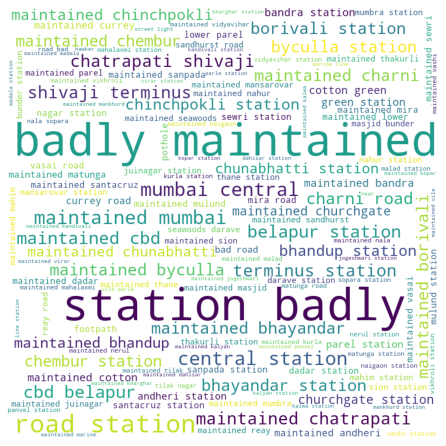

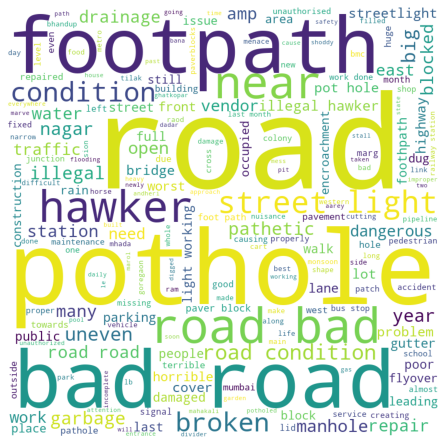

In [113]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
#  

for i in range(len(input)):      
    if(output[i]==15):
        comment_words += " "+input[i]+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

comment_words = '' 

for i in range(len(input)):      
    if(output[i]==9):
        comment_words += " "+input[i]+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

  

## Train test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2) 


In [69]:
X_train[0]

'badly maintained bhandup station'

## Tokenize the data

In [70]:
vocab_size = 800
embedding_dim = 100
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences)
max_len=len(X_train[0])
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=max_len)

In [71]:
X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  4, 19,  2])

In [72]:
import tensorflow as tf
print(tf.__version__)


1.14.0


## Build Machine Learning model with Word Embeddings

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=len(X_train[0])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(23, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 14, 100)           80000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 8406      
_________________________________________________________________
dense_17 (Dense)             (None, 23)                161       
Total params: 88,567
Trainable params: 88,567
Non-trainable params: 0
_________________________________________________________________


## Train and fit model

In [78]:
num_epochs = 10
model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test))

Train on 6747 samples, validate on 1687 samples
Epoch 1/10
6747/6747 [==============================] - 2s 305us/sample - loss: 2.1147 - acc: 0.3665 - val_loss: 1.1745 - val_acc: 0.7967
Epoch 2/10
6747/6747 [==============================] - 2s 237us/sample - loss: 1.0863 - acc: 0.7759 - val_loss: 0.5588 - val_acc: 0.7830
Epoch 3/10
6747/6747 [==============================] - 1s 196us/sample - loss: 0.4698 - acc: 0.8430 - val_loss: 0.4020 - val_acc: 0.8749
Epoch 4/10
6747/6747 [==============================] - 2s 228us/sample - loss: 0.3969 - acc: 0.8706 - val_loss: 0.3766 - val_acc: 0.9004
Epoch 5/10
6747/6747 [==============================] - 1s 175us/sample - loss: 0.3406 - acc: 0.9017 - val_loss: 0.3340 - val_acc: 0.9087
Epoch 6/10
6747/6747 [==============================] - 1s 193us/sample - loss: 0.2846 - acc: 0.9097 - val_loss: 0.3084 - val_acc: 0.9129
Epoch 7/10
6747/6747 [==============================] - 1s 213us/sample - loss: 0.2422 - acc: 0.9252 - val_loss: 0.2991 - va

In [79]:
X_test.shape

(1687, 14)

## Model Prediction

In [80]:
preds=model.predict(X_test)

In [81]:
pred=[]
for i in preds:
    pred.append(i.argmax())

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           6       0.79      0.83      0.81        93
           8       0.00      0.00      0.00         2
           9       0.66      0.94      0.77       160
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00      1317
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         9
          18       0.00      0.00      0.00         1
          19       0.72      0.59      0.65        44
          21       0.00    

## Overall Accuracy

In [84]:
print(accuracy_score(y_test, pred))

0.9318316538233551


## Example

In [85]:
sentence=['many potholes on road']


In [86]:
for x in range(len(sentence)):
    print(x)
    s=input[x].split()
    s1=[]
    for i in s:
        if(i not in stop):
            s1.append(lemmatizer.lemmatize(i))
    input[x]=' '.join(s1)

0


In [87]:
test = tokenizer.texts_to_sequences(sentence)
test = pad_sequences(test,maxlen=max_len)

In [88]:
test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118,   1,   1,
          5]])

In [89]:
np.argmax(model.predict(test))

9

In [91]:
labelEncoder.inverse_transform([np.argmax(model.predict(test))])[0]

'Mobility - Roads, Footpaths and Infrastructure'

## Save and reload model

In [92]:
model.save('m.h5')

In [93]:
import tensorflow as tf 
m = tf.keras.models.load_model('m.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Import and pickle tokenizer

In [94]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

## Use translation

In [95]:
from googletrans import Translator

In [100]:
translator = Translator()
x=translator.translate('Mere ghar ki bahaar ke sadak par pothole hai', dest='en')

In [101]:
x.text

'There is a pothole on the street outside my house'

In [103]:
input[0]

'pothole illegal parking movement heavy vehicle'